In [658]:
import pandas as pd

In [659]:
import numpy as np
from numpy import array
import matplotlib.pyplot as plt

In [660]:
np.random.seed(42)

In [661]:
df = pd.read_excel('FFFfffinal_Data.xlsx')

In [662]:
df

,Year,Country,ANER; Female,Above Proficiency;PISA 2000 for grade 15Y using MPL Level 2 for math,Above Proficiency;TIMSS 2003 for grade 4 using MPL Low (400 points) for math,Above Proficiency;TIMSS 2007 for grade 4 using MPL Low (400 points) for math,Above Proficiency;TIMSS 2019 for grade 4 using MPL Low (400 points) for math,"Adjusted net attendance rate, one year before the official primary entry age, adjusted gender parity index (GPIA)","Adjusted net enrolment rate, one year before the official primary entry age, adjusted gender parity index (GPIA)",Administration of a nationally representative learning assessment in Grade 2 or 3 in mathematics (number),...,Number of neonatal deaths,"Physicians (per 1,000 people)","Population ages 15-19, male (% of male population)","Population ages 35-39, male","Population ages 55-59, male (% of male population)","Population ages 65 and above, male (% of male population)",Rural population growth (annual %),"School enrollment, secondary, female (% gross)",Sex ratio at birth (male births per female births),Debt Percent of GDP
0,1960,Afghanistan,..,..,..,..,..,..,..,..,...,..,0.035,10.252415,261456,2.666401,2.949109,..,..,1.049,no data
1,1961,Afghanistan,..,..,..,..,..,..,..,..,...,..,..,10.291583,266698,2.633083,2.921745,1.616510333,..,1.049,no data
2,1962,Afghanistan,..,..,..,..,..,..,..,..,...,..,..,10.310921,272509,2.592152,2.889481,1.694596635,..,1.049,no data
3,1963,Afghanistan,..,..,..,..,..,..,..,..,...,..,..,10.263812,278443,2.548916,2.855172,1.748878535,..,1.049,no data
4,1964,Afghanistan,..,..,..,..,..,..,..,..,...,..,..,10.162685,283951,2.512455,2.821868,1.797359522,..,1.049,no data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10894,2018,Zimbabwe,..,..,..,..,..,..,..,1,...,12874,0.201,11.836914,429834,1.591278,2.877222,2.061844399,..,1.023,51.00144461
10895,2019,Zimbabwe,..,..,..,..,..,0.9735,..,1,...,12638,..,11.782546,450009,1.567252,2.902687,1.987780433,..,1.023,82.33805679
10896,2020,Zimbabwe,..,..,..,..,..,..,..,..,...,12421,0.189,11.662186,462417,1.555282,2.902155,1.983890973,..,1.024,84.44771597
10897,2021,Zimbabwe,..,..,..,..,..,..,..,..,...,12211,..,11.512926,463351,1.549076,2.856109,1.955651308,..,1.024,59.80656696


In [663]:
df = df.drop(df.columns[0], axis=1)

In [664]:
df.replace("..", -999, inplace=True)

In [665]:
df.replace("no data", -999, inplace=True)

In [666]:
df.fillna(-999, inplace=True)

In [667]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Country'] = le.fit_transform(df['Country'])
df

,Country,ANER; Female,Above Proficiency;PISA 2000 for grade 15Y using MPL Level 2 for math,Above Proficiency;TIMSS 2003 for grade 4 using MPL Low (400 points) for math,Above Proficiency;TIMSS 2007 for grade 4 using MPL Low (400 points) for math,Above Proficiency;TIMSS 2019 for grade 4 using MPL Low (400 points) for math,"Adjusted net attendance rate, one year before the official primary entry age, adjusted gender parity index (GPIA)","Adjusted net enrolment rate, one year before the official primary entry age, adjusted gender parity index (GPIA)",Administration of a nationally representative learning assessment in Grade 2 or 3 in mathematics (number),All staff compensation as % of total expenditure in lower secondary public institutions (%),...,Number of neonatal deaths,"Physicians (per 1,000 people)","Population ages 15-19, male (% of male population)","Population ages 35-39, male","Population ages 55-59, male (% of male population)","Population ages 65 and above, male (% of male population)",Rural population growth (annual %),"School enrollment, secondary, female (% gross)",Sex ratio at birth (male births per female births),Debt Percent of GDP
0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,...,-999,0.035,10.252415,261456,2.666401,2.949109,-999,-999,1.049,-999
1,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,...,-999,-999,10.291583,266698,2.633083,2.921745,1.616510333,-999,1.049,-999
2,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,...,-999,-999,10.310921,272509,2.592152,2.889481,1.694596635,-999,1.049,-999
3,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,...,-999,-999,10.263812,278443,2.548916,2.855172,1.748878535,-999,1.049,-999
4,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,...,-999,-999,10.162685,283951,2.512455,2.821868,1.797359522,-999,1.049,-999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10894,172,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,1.0,-999.0,...,12874,0.201,11.836914,429834,1.591278,2.877222,2.061844399,-999,1.023,51.00144461
10895,172,-999.0,-999.0,-999.0,-999.0,-999.0,0.9735,-999.0,1.0,-999.0,...,12638,-999,11.782546,450009,1.567252,2.902687,1.987780433,-999,1.023,82.33805679
10896,172,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,...,12421,0.189,11.662186,462417,1.555282,2.902155,1.983890973,-999,1.024,84.44771597
10897,172,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,...,12211,-999,11.512926,463351,1.549076,2.856109,1.955651308,-999,1.024,59.80656696


## LSTM

In [668]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Dropout
from sklearn.metrics import mean_absolute_error

In [669]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = [], []
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, -1]  
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y).reshape(len(y), n_steps_out, 1) 

In [670]:
data = df.to_numpy()

In [671]:
# number of steps in and out
n_steps_in, n_steps_out = 10, 5

In [672]:
# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [673]:
# Split into input and outputs
X, y = split_sequences(data_normalized, n_steps_in, n_steps_out)

In [674]:
X_train = X[:-n_steps_out]
y_train = y[:-n_steps_out]

X_test = X[-n_steps_out:]
y_test = y[-n_steps_out:]

In [675]:
print('trainX shape == {}.'.format(X_train.shape))
print('trainY shape == {}.'.format(y_train.shape))

trainX shape == (10880, 10, 113).
trainY shape == (10880, 5, 1).


### Custom Loss Function 

In [609]:
from keras import backend as K

def scaled_mean_squared_error(y_true, y_pred):
    scale = K.constant(5.0)  
    return K.mean(K.square((y_true - y_pred) * scale))

In [581]:
def custom_asymmetric_loss(y_true, y_pred):
    underestimation_cost = 1.5  
    overestimation_cost = 1.0

    loss = K.switch(
        K.greater(y_true, y_pred),
        underestimation_cost * K.square(y_true - y_pred),
        overestimation_cost * K.square(y_true - y_pred)
    )
    return K.mean(loss)


In [648]:
def mean_squared_logarithmic_error(y_true, y_pred):
    return K.mean(K.square(K.log(1 + y_true) - K.log(1 + y_pred)))

### Custom Metric

In [676]:
from keras import backend as K

def mean_cubed_error_metric(y_true, y_pred):
    return K.mean(K.pow(K.abs(y_true - y_pred), 3))

### Model

In [677]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, X.shape[2])))
model.add(RepeatVector(n_steps_out))  # Specifies the number of time steps to predict
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))  # Output layer that predicts a single value at each time step
model.compile(optimizer='adam', loss='mse', metrics=[mean_cubed_error_metric])

In [678]:
# Fit model
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0393 - mean_cubed_error_metric: 0.0147
Epoch 2/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0220 - mean_cubed_error_metric: 0.0085
Epoch 3/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0198 - mean_cubed_error_metric: 0.0079
Epoch 4/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0185 - mean_cubed_error_metric: 0.0075
Epoch 5/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0176 - mean_cubed_error_metric: 0.0072
Epoch 6/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0168 - mean_cubed_error_metric: 0.0070
Epoch 7/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0164 - mean_cubed_error_metric: 0.0068
Epoch 8/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0155 - mean_cubed_error_metric: 0.0065
Epoch 9/50
340/340 [==============================] - 1s 2ms/step - loss: 0.0152

In [679]:
# predict the test set
yhat = model.predict(X_test, verbose=0)

In [680]:
print("y_test shape:", y_test.shape)
print("yhat shape:", yhat.shape)

y_test shape: (5, 5, 1)
yhat shape: (5, 5, 1)


In [681]:
yhat_reshaped = yhat.reshape(-1, yhat.shape[2])  # Reshape 
y_test_reshaped = y_test.reshape(-1, y_test.shape[2])  

In [682]:
mae_per_timestep = mean_absolute_error(y_test_reshaped, yhat_reshaped, multioutput='raw_values')

In [683]:
overall_mae = mean_absolute_error(y_test_reshaped, yhat_reshaped)
overall_mae

0.027792203268806524

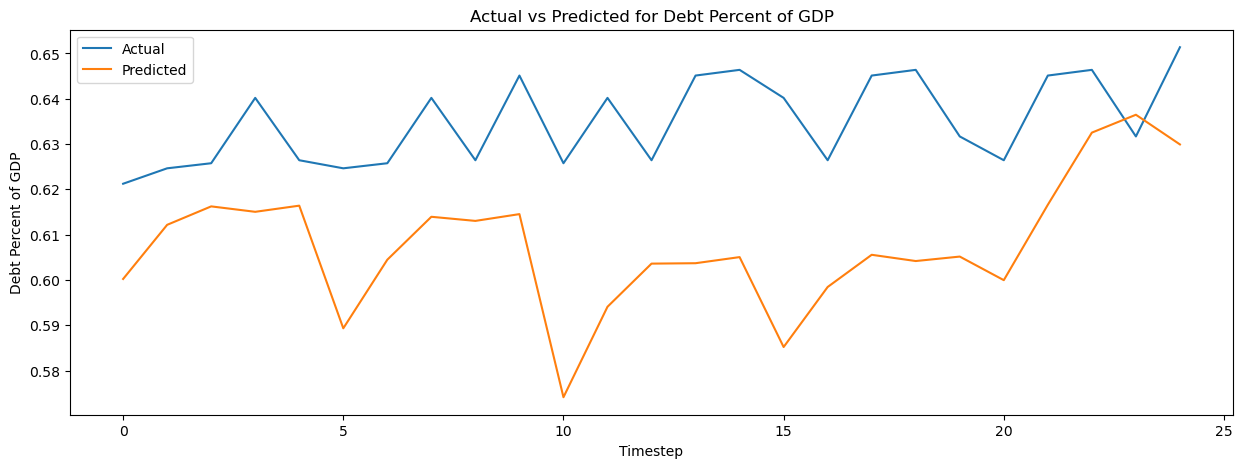

In [684]:
plt.figure(figsize=(15,5))
plt.plot(y_test_reshaped[:, 0], label='Actual')  
plt.plot(yhat_reshaped[:, 0], label='Predicted')  
plt.title('Actual vs Predicted for Debt Percent of GDP')
plt.xlabel('Timestep')
plt.ylabel('Debt Percent of GDP')  
plt.legend()
plt.show()

## Predictions

In [695]:
df = pd.read_excel('FFFfffinal_Data.xlsx')

In [696]:
df = df.drop(df.columns[0], axis=1)

In [697]:
df.replace("..", -999, inplace=True)

In [698]:
df.replace("no data", -999, inplace=True)

In [699]:
df.fillna(-999, inplace=True)

In [700]:
argentina_data = df[df['Country'] == 'Argentina']

In [701]:
argentina_data['Country'] = le.transform(argentina_data['Country'])

/var/folders/hd/xr2z9snj7yl69m8f9f6z_vg80000gn/T/ipykernel_44582/1864289454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  argentina_data['Country'] = le.transform(argentina_data['Country'])


In [702]:
data_argentina = argentina_data.to_numpy()
data_argentina_normalized = scaler.transform(data_argentina)
X_argentina, y_argentina = split_sequences(data_argentina_normalized, n_steps_in, n_steps_out)

In [703]:
yhat_argentina = model.predict(X_argentina, verbose=0)

In [704]:
yhat_argentina

array([[[0.61000353],
        [0.617409  ],
        [0.62454474],
        [0.62645435],
        [0.62795407]],

       [[0.6070374 ],
        [0.6147751 ],
        [0.61770695],
        [0.61669666],
        [0.6176709 ]],

       [[0.61515814],
        [0.62122345],
        [0.6257832 ],
        [0.6258977 ],
        [0.6262657 ]],

       [[0.614955  ],
        [0.6223851 ],
        [0.6271009 ],
        [0.62783206],
        [0.62870115]],

       [[0.61290526],
        [0.620988  ],
        [0.6256113 ],
        [0.626655  ],
        [0.62778145]],

       [[0.61431164],
        [0.6219106 ],
        [0.6271484 ],
        [0.62821835],
        [0.6293968 ]],

       [[0.60386604],
        [0.61880136],
        [0.6174944 ],
        [0.6135534 ],
        [0.61053765]],

       [[0.60851467],
        [0.61648774],
        [0.6193151 ],
        [0.61915535],
        [0.61945057]],

       [[0.6122977 ],
        [0.61900294],
        [0.6255555 ],
        [0.62659603],
        [0.62789